Mean Squared Error: 201.57


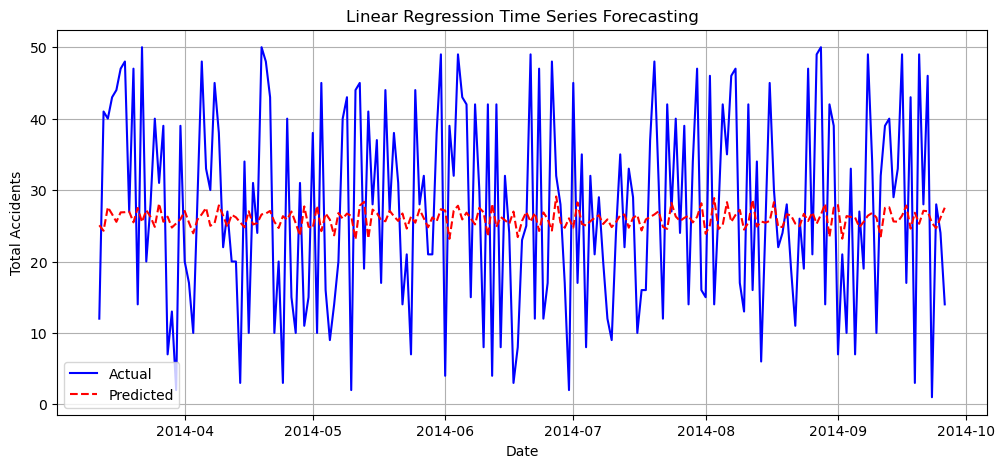

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the time series data
file_path = r"C:\Users\HARISH\Downloads\accident_time_series_1000_rows.csv"
accident_df = pd.read_csv(file_path, parse_dates=["Date"], index_col="Date")

# Verify column names
if "Total Accidents" not in accident_df.columns:
    raise ValueError("Column 'Total Accidents' not found in dataset. Check column names.")

# Select the "Total Accidents" column
time_series = accident_df["Total Accidents"].dropna()

# Convert time series data to supervised learning
def create_lagged_features(data, lag=1):
    df = pd.DataFrame(data)
    for i in range(1, lag + 1):
        df[f"Lag_{i}"] = df["Total Accidents"].shift(i)
    return df.dropna()

# Define lag (how many past values to use as features)
lag = 5  
supervised_data = create_lagged_features(time_series, lag)

# Split data into training and testing sets
train_size = int(len(supervised_data) * 0.8)
train, test = supervised_data.iloc[:train_size], supervised_data.iloc[train_size:]

# Prepare features (X) and target (y)
X_train, y_train = train.drop(columns=["Total Accidents"]), train["Total Accidents"]
X_test, y_test = test.drop(columns=["Total Accidents"]), test["Total Accidents"]

# Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(12, 5))
plt.plot(y_test.index, y_test, label="Actual", color="blue")
plt.plot(y_test.index, y_pred, label="Predicted", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Total Accidents")
plt.title("Linear Regression Time Series Forecasting")
plt.legend()
plt.grid(True)
plt.show()
